<a href="https://colab.research.google.com/github/sameersat96/Yes-Bank-Stock-Closing_Price_Prediction/blob/main/Yes_Bank_Prediction__LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE NECESSARY LIBRARIES**

In [7]:
#Importing all the libarary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## **IMPORTING THE DATASET'S INTO OUR COLLAB NOTEBOOK**

In [2]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*   Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated

In [3]:
df_yesbank =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/Yes bank stock closing price prediction - Sameer Satpute/Copy of data_YesBank_StockPrices.csv")

In [4]:
#Shape of our dataset
df_yesbank.shape

(185, 5)



## **Knowing the dataset**
Dataset contains Yes Bank stock monthly prices since it listed on stock exchange. 

Following are its features:-

* **Date**: In our data its monthly observation of stock since it listed.
* **Open**: The price a stock when the stock exchange open for the day.
* **High**: The maximum price of a stock attain during given period of time.
* **Low**: The minimum price of a stock attain during given period of time.
* **Close**: The price of a stock when the stock exchange closed for the day.






In [5]:
#checking first five values of our dataset
df_yesbank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
#Checking last five values  of our dataset
df_yesbank.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#Getting the concise summary of data
df_yesbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


From above we can conclude that:


1.   The shape of our dataset is 185 rows and 5 columns
2.   Datatype of Date is given as object which we need to change that to DateTime
3.  Yes bank stock listed on month of july 2005.We have data available from july 2005 to november 2020



### **Gettting Statistical Information about our dataset**

In [ ]:
# Getting some statistical information
df_yesbank.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


From above statistical information we can see that it is not a normal distribution as mean and 50% values are having alot of difference

## **DATA CLEANING**

In data cleaning we will check for:


1.   Null values/NaN values
2.   Duplicates 
3.   Outlier Detection

In [ ]:
#Check for duplicate values
len(df_yesbank[df_yesbank.duplicated()])

0

In [ ]:
#Check the columns present in dataset
df_yesbank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
#Check for null values in dataset
df_yesbank.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

## **Data Type Correction**

In [ ]:
#Changing date colunn datatype to datetime format.
from datetime import datetime

#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
df_yesbank['Date'] = df_yesbank['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
#Check the datatype of the columns after changing datatype of date
df_yesbank.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

-----YES!!! datatype change into reqiured format

In [ ]:
df_yesbank.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
df_yesbank.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


In [9]:
df1=df_yesbank.reset_index()['Close']

In [10]:
df1

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64

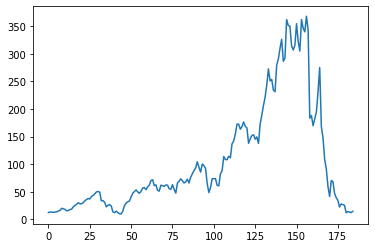

In [11]:
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[6.92892266e-03]
 [9.61108628e-03]
 [9.27581582e-03]
 [8.40970049e-03]
 [9.58314707e-03]
 [1.04213232e-02]
 [1.49474743e-02]
 [1.71546714e-02]
 [2.82185963e-02]
 [2.65701833e-02]
 [2.24910595e-02]
 [1.57577112e-02]
 [1.72664283e-02]
 [2.19602146e-02]
 [2.36924452e-02]
 [3.57621815e-02]
 [4.28587394e-02]
 [4.74687081e-02]
 [5.63813143e-02]
 [5.21066160e-02]
 [5.07375950e-02]
 [5.68004023e-02]
 [6.57409477e-02]
 [7.26419312e-02]
 [7.80900760e-02]
 [7.54637908e-02]
 [8.76732231e-02]
 [9.35963344e-02]
 [1.01139920e-01]
 [1.11281851e-01]
 [1.13321413e-01]
 [1.10192222e-01]
 [6.64114886e-02]
 [6.72776039e-02]
 [5.90914171e-02]
 [3.59577559e-02]
 [4.32219490e-02]
 [4.70775592e-02]
 [3.95339741e-02]
 [1.00581135e-02]
 [6.37013858e-03]
 [1.41092982e-02]
 [6.31426017e-03]
 [7.82297720e-04]
 [0.00000000e+00]
 [1.52827447e-02]
 [4.22999553e-02]
 [5.50402325e-02]
 [6.13265534e-02]
 [6.55733125e-02]
 [8.66394725e-02]
 [1.04297050e-01]
 [1.13405230e-01]
 [1.21339964e-01]
 [1.11365668e-01]
 [1.043249

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(120, 65)

In [16]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
import numpy
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
print(X_train.shape), print(y_train.shape)

(89, 30)
(89,)


(None, None)

In [33]:
print(X_test.shape), print(ytest.shape)

(34, 30)
(34,)


(None, None)

In [34]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 7s 1s/step - loss: 0.0439 - val_loss: 0.2253
Epoch 2/100
2/2 [==============================] - 0s 71ms/step - loss: 0.0251 - val_loss: 0.1264
Epoch 3/100
2/2 [==============================] - 0s 79ms/step - loss: 0.0123 - val_loss: 0.0916
Epoch 4/100
2/2 [==============================] - 0s 74ms/step - loss: 0.0074 - val_loss: 0.1718
Epoch 5/100
2/2 [==============================] - 0s 68ms/step - loss: 0.0119 - val_loss: 0.1421
Epoch 6/100
2/2 [==============================] - 0s 99ms/step - loss: 0.0088 - val_loss: 0.0902
Epoch 7/100
2/2 [==============================] - 0s 66ms/step - loss: 0.0061 - val_loss: 0.0715
Epoch 8/100
2/2 [==============================] - 0s 73ms/step - loss: 0.0072 - val_loss: 0.0672
Epoch 9/100
2/2 [==============================] - 0s 66ms/step - loss: 0.0080 - val_loss: 0.0660
Epoch 10/100
2/2 [==============================] - 0s 70ms/step - loss: 0.0074 - val_loss: 0.0738
Epoch 11/100
2/2 [===

In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.9.2'

In [43]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 10ms/step
